# Fitted eBOSS quasar multipole results

This notebook investigates the results for the measured eBOSS quasar power spectrum multipoles.

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('..')
from scripts import fit_poles

from nbodykit import cosmology

In [3]:
# set up the cosmology
z = 1.5
cosmo = cosmology.Cosmology(H0=67.7, Om0=0.31, sigma8=0.8, n_s=0.97, flat=True)
Plin = cosmology.EHPower(cosmo, z)
Plin_nw = cosmology.NoWiggleEHPower(cosmo, z)
f = cosmo.growth_rate(z)

P0_norm = lambda k, b1: (1. + 2./3*f/b1 + 1./5*(f/b1)**2) * b1**2 * Plin_nw(k)

# 1  Fitted results

In this section, we show $\chi^2$ fits to the monopole, quadrupole, and hexadecapole, using a simple, damped Kaiser model for $P(k,\mu)$.

### Model for $P(k,\mu)$

The theoretical power spectrum multipoles are given by

$$
P_{\ell} = \frac{2\ell+1}{2} \int_{-1}^{1} d\mu P(k,\mu) \mathcal{L}_{\ell}(\mu),
$$
where $\mathcal{L}_{\ell}(\mu)$ is the Legendre polynomial of order $\ell$ and the model for $P(k,\mu)$ is given by:

$$
P(k,\mu) = \exp\left[-(k \mu \sigma)^2 \right]^2  b_1^2  P_\mathrm{lin} 
                \left [ 1 + 2 \frac{f}{b_1} \mu^2 + \frac{f^2}{b_1^2} \mu^4 \right ].
$$
So, the parameters of the model are the velocity dispersion $\sigma$ and the linear bias $b_1$.

### Error estimates

In order to compute $\chi^2$ fits, we need estimates for the errors on the power spectrum multipoles.  We do this using Gaussian statistics, following eqs. 18 and 19 of  [Yamamoto et al. 2004](https://arxiv.org/abs/astro-ph/0505115). This calculation accounts for the variation in the $n(z)$ and the use of FKP weights.

The covariance between two $P_{\ell}$ and  $P_{\ell'}$ is given by:

$$
C_{\ell, \ell'}(k) = \frac{(2 \pi)^3}{4 \pi k^2 \Delta k} \frac{1}{W^2} \int_0^1 d\mu \int d^3s \bar{n}^4(s) w^4(s) \left [P(k, \mu) + \bar{n}^{-1}(s) \right]^2 \mathcal{L}_\ell(\mu)  \mathcal{L}_{\ell'}(\mu),
$$
where 

$$
W = \int d^3s \bar{n}^2(s) w^2(s).
$$

Given $\bar{n}$ sampled at a series of redshifts and the above model for $P(k,\mu)$ sampled at a series of $\mu$ bins for each $k$, the above equation becomes

$$
C_{\ell, \ell'}(k) = \frac{(2 \pi)^3}{4 \pi k^2 \Delta k}  \frac{1}{W^2} \sum_{\mu_i=0}^{\mu_i=1} \Delta \mu \sum_{z_i=z_\mathrm{min}}^{z_i=z_\mathrm{max}} \Delta V_i \bar{n}^4(z_i) w^4(z_i) \left [P(k, \mu_i) + \bar{n}^{-1}(z_i) \right]^2  \mathcal{L}_\ell(\mu_i)  \mathcal{L}_{\ell'}(\mu_i),
$$

Here, $w$ are the FKP weights, given by $w = (1 + n(z) P_0)^{-1}$, with $P_0 = 6000 \ [\mathrm{Mpc}/h]^3$. The error on the individual multipole points is then the square root of $C_{\ell \ell}$.

When performing the $\chi^2$ fits, we recompute the covariance for each set of model parameters $(b_1, \sigma)$ being explored.

## 1.1 monopole, $P_0(k)$ (with sys. weights)


### 1.1.1 full $k$-range (truncated $y$-axis limits)

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


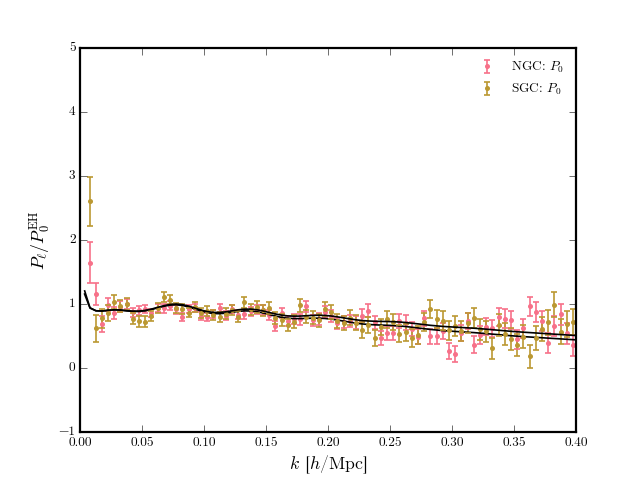

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.010016
sigma = 3.697551


In [4]:
for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    
    
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[0], ylims=[-1,5], labels=[sam+'GC'])
    
ax.set_xlim(0, 0.4) 
legend()
show()

### 1.1.2 low-$k$ only

b1 = 2.017633
sigma = 6.052590


<IPython.core.display.Javascript object>


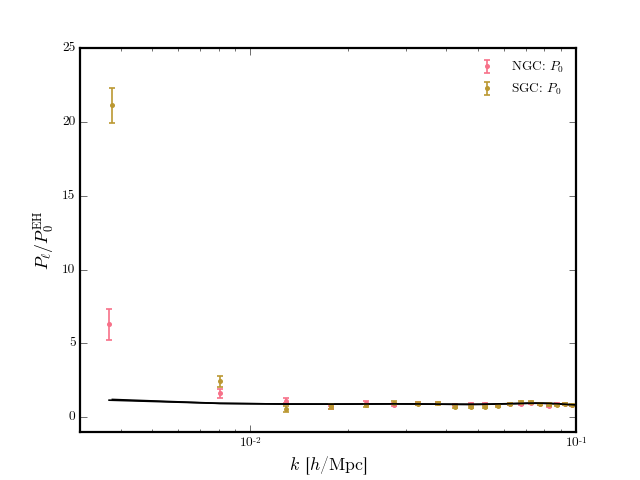

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.087133
sigma = 5.732142


In [8]:

for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.1, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[0], ylims=[-1,25], labels=[sam+'GC'])

ax.set_xlim(3e-3, 0.1)  
ax.set_xscale('log')
legend()
show()

## 1.2 quadrupole, $P_2(k)$ (with sys. weights)

### 1.2.1 full $k$-range (truncated $y$-axis limits)

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


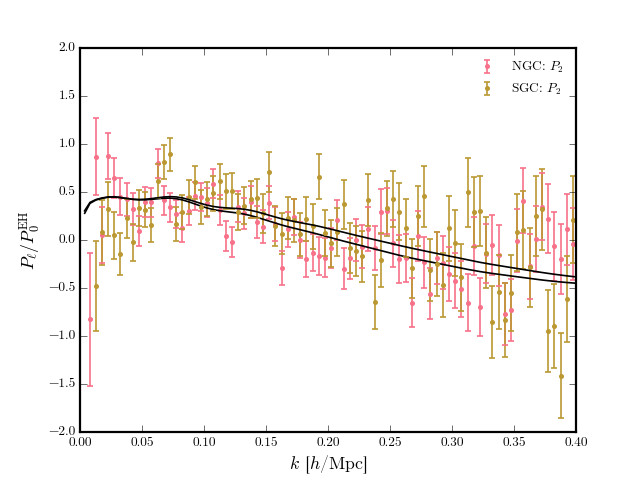

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.010016
sigma = 3.697551


In [9]:
for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[2], ylims=[-2,2], labels=[sam+'GC'])

ax.set_xlim(0, 0.4)
legend()
show()

### 1.2.2 low-$k$ only

b1 = 2.017633
sigma = 6.052590


<IPython.core.display.Javascript object>


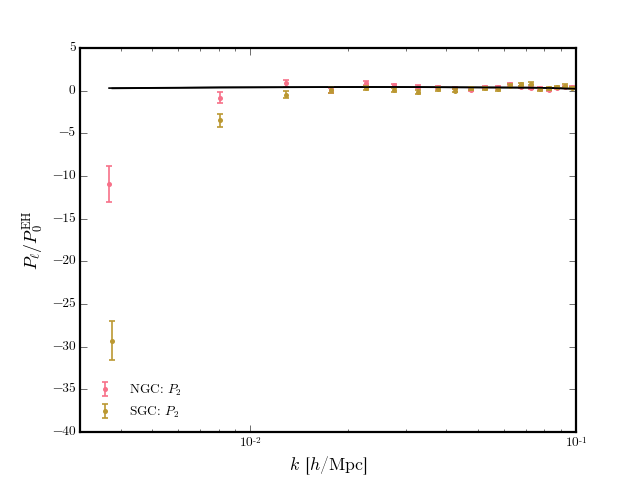

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.087133
sigma = 5.732142


In [10]:
for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.1, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[2], ylims=[-40,5], labels=[sam+'GC'])
    
ax.set_xlim(3e-3, 0.1)  
ax.set_xscale('log')

legend(loc=0)
show()

# 1.3 hexadecapole, $P_4(k)$ (with sys. weights)

### 1.3.1 full $k$-range (truncated $y$-axis limits)

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


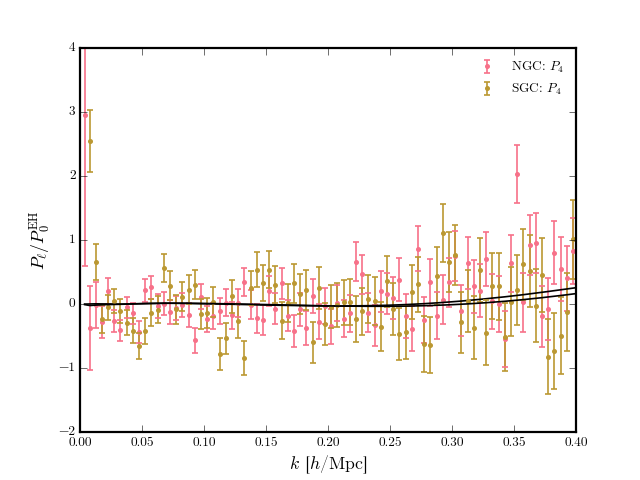

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.010016
sigma = 3.697551


In [11]:
for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[4], ylims=[-2,4], labels=[sam+'GC'])

ax.set_xlim(0., 0.4)
legend()
show()

### 1.3.2 low-$k$ only

b1 = 2.017633
sigma = 6.052590


<IPython.core.display.Javascript object>


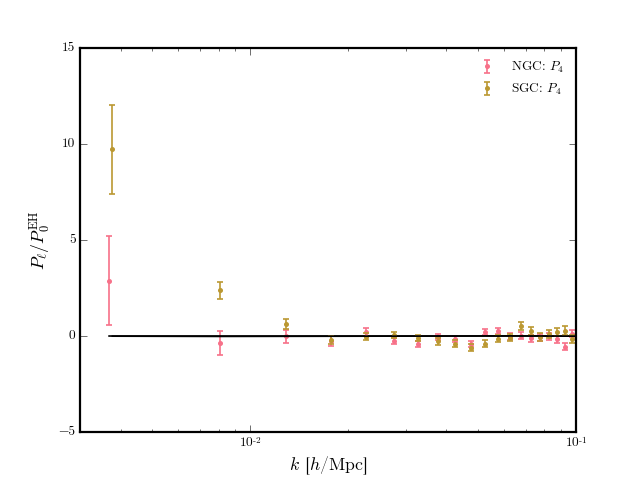

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.087133
sigma = 5.732142


In [12]:
for sam in ['N', 'S']:
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
 
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.1, window_transfer=transfer)
    ax = fit_poles.plot_bestfit(bestfits, normalize=True, ells=[4], ylims=[-5,15], labels=[sam+'GC'])

ax.set_xlim(3e-3, 0.1)  
ax.set_xscale('log')

legend()
show()

# 2.  With and without sys. weights (NGC only)

In this section, we focus on the low-$k$ behavior of the multipoles, especially the changes induced when systematics are or are not used to weight the quasar density field.

The systematic weights definitely reduce (but do not eliminate) the large deviations in the low-$k$ behavior.

## 2.1 monopole $P_0(k)$

/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 1.985794
sigma = 4.358935


/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 2.011795
sigma = 4.449717


<IPython.core.display.Javascript object>


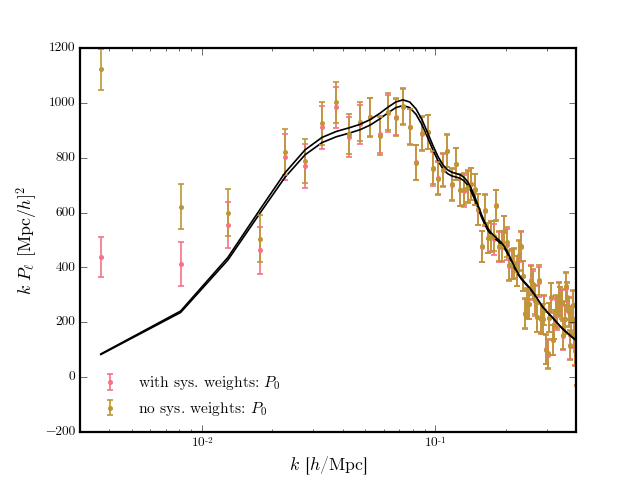

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [24]:
filenames = ['../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.dat',
            '../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0_nosysweight.dat']
nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-N-eboss_v1.6.dat'

bestfits = fit_poles.find_bestfit(filenames, nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
ax = fit_poles.plot_bestfit(bestfits, normalize=False, ells=[0], ylims=None, labels=['with sys. weights', 'no sys. weights'])
    
ax.set_xlim(3e-3, 0.4)
show()

## 2.2 quadrupole $P_2(k)$

/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 1.985794
sigma = 4.358935


/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 2.011795
sigma = 4.449717


<IPython.core.display.Javascript object>


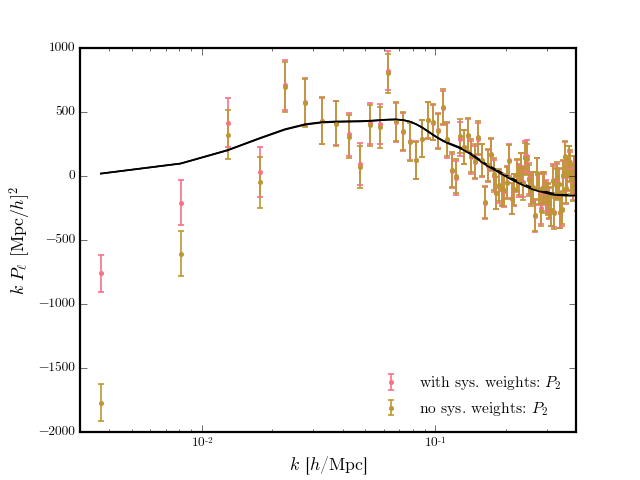

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [23]:
filenames = ['../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.dat',
            '../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0_nosysweight.dat']
nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-N-eboss_v1.6.dat'


bestfits = fit_poles.find_bestfit(filenames, nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
ax = fit_poles.plot_bestfit(bestfits, normalize=False, ells=[2], ylims=None, labels=['with sys. weights', 'no sys. weights'])

ax.set_xlim(3e-3, 0.4)
show()

## 2.3 hexadecapole, $P_4(k)$

/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 1.985794
sigma = 4.358935


/Users/nhand/Research/Programs/nbodykit/nbodykit/dataset.py:482: DeprecationWarning: storage of DataSet objects as ASCII plaintext files is deprecated; see DataSet.from_json
  warnings.warn(msg, DeprecationWarning)


b1 = 2.011795
sigma = 4.449717


<IPython.core.display.Javascript object>


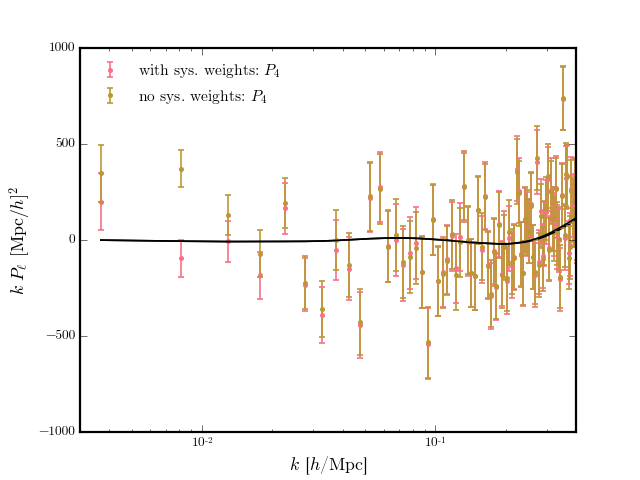

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [25]:
filenames = ['../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.dat',
            '../spectra/poles_eboss_v1.6-QSO-N-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0_nosysweight.dat']
nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-N-eboss_v1.6.dat'

bestfits = fit_poles.find_bestfit(filenames, nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)
ax = fit_poles.plot_bestfit(bestfits, normalize=False, ells=[4], ylims=None, labels=['with sys. weights', 'no sys. weights'])
    
ax.set_xlim(3e-3, 0.4)
show()

# 3 Removing $\mu=0$ systematics

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


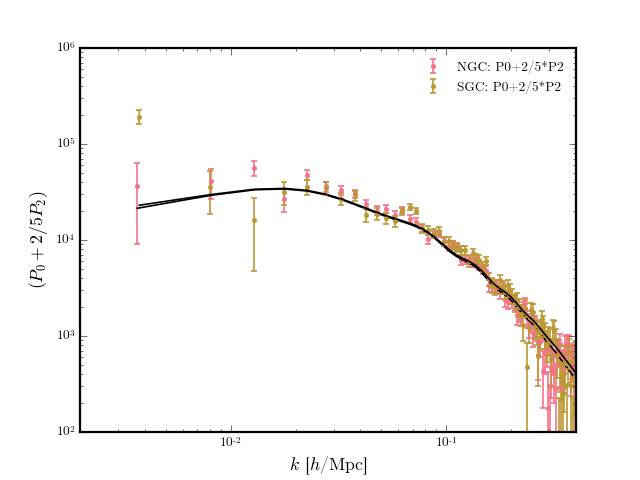

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.010016
sigma = 3.697551


In [10]:
## log-log plot

for sam in ['N', 'S']:

    # find the bestfit data and theory
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)

    # data and theory func
    r, theory_func = bestfits[0]
    theory, cov = theory_func(r['k'], ell=0, ellprime=2)
    
    # P = P0 + 2/5 * P2
    P = r['power_0'] + 2./5 * r['power_2'] 
    
    # gaussian error = (var(X) + var(Y) + 2*cov(X,Y))**1/2
    errs = (r['error_0']**2 + (2./5*r['error_2'])**2 + 2 * 2./5 * cov)**0.5

    # plot
    errorbar(r['k'], P, errs, ls='', marker='.', label='%sGC: P0+2/5*P2' %sam)
    plot(r['k'], theory, c='k')

ax = gca()
legend(loc=0)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$k$ [$h$/Mpc]', fontsize=16)
ax.set_ylabel(r'$(P_0 + 2/5 P_2)$', fontsize=16)
ax.set_xlim(2e-3, 0.4)
ax.set_ylim(1e2, 1e6)
show()

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


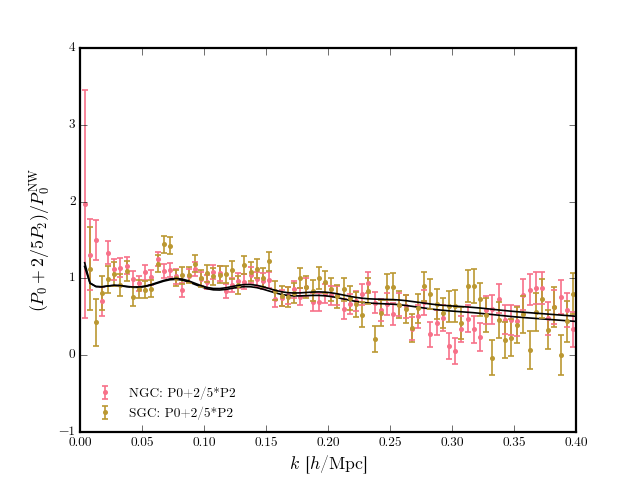

/Users/nhand/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


b1 = 2.010016
sigma = 3.697551


In [9]:
## normalized plot

for sam in ['N', 'S']:

    # find the bestfit data and theory
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)

    # data and theory func
    r, theory_func = bestfits[0]
    theory, cov = theory_func(r['k'], ell=0, ellprime=2)
    
    # P = P0 + 2/5 * P2
    P = r['power_0'] + 2./5 * r['power_2'] 
    
    # gaussian error = (var(X) + var(Y) + 2*cov(X,Y))**1/2
    errs = (r['error_0']**2 + (2./5*r['error_2'])**2 + 2 * 2./5 * cov)**0.5

    # plot
    N = P0_norm(r['k'], theory_func.b1)
    errorbar(r['k'], P/N, errs/N, ls='', marker='.', label='%sGC: P0+2/5*P2' %sam)
    plot(r['k'], theory/N, c='k')

ax = gca()
legend(loc=0)

ax.set_xlabel(r'$k$ [$h$/Mpc]', fontsize=16)
ax.set_ylabel(r'$(P_0 + 2/5 P_2) / P^\mathrm{NW}_0$', fontsize=16)
ax.set_xlim(0, 0.4)
ax.set_ylim(-1, 4)
show()

b1 = 1.993188
sigma = 4.235345


<IPython.core.display.Javascript object>


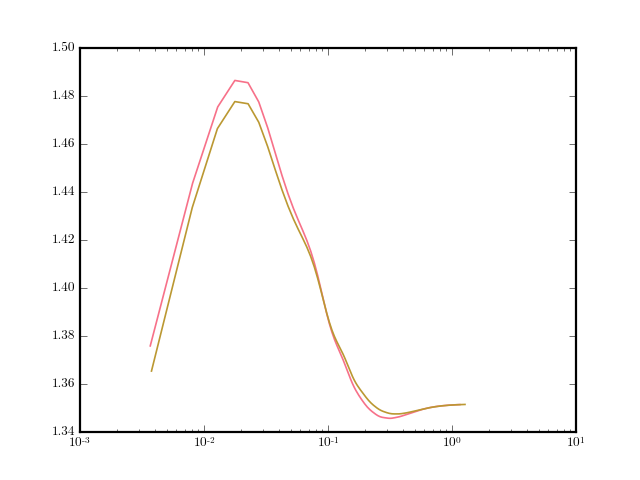

b1 = 2.010016
sigma = 3.697551


In [5]:
for sam in ['N', 'S']:

    # find the bestfit data and theory
    filename = '../spectra/poles_eboss_v1.6-QSO-%s-eboss_v1.6_zrange_0.8_2.2_dk005_kmin0.json' %sam 
    nbar_file = '../../Meta/nbar-eboss_v1.6-QSO-%s-eboss_v1.6.dat' %sam
    transfer = '../../Results/window/%sgc_window_transfer.dat' %sam.lower()
    bestfits = fit_poles.find_bestfit([filename], nbar_file, sam+'GC', kmin=0, kmax=0.4, window_transfer=transfer)

    # data and theory func
    r, theory_func = bestfits[0]
    theory, cov = theory_func(r['k'], ell=0, ellprime=2)
    
    # P = P0 + 2/5 * P2
    P = r['power_0'] + 2./5 * r['power_2'] 
    
    # gaussian error = (var(X) + var(Y) + 2*cov(X,Y))**1/2
    errs = (r['error_0']**2 + (2./5*r['error_2'])**2 + 2 * 2./5 * cov)**0.5
    
    semilogx(r['k'], errs / r['error_0'])
    
show()